## Please, fill in before you start:

First Name: Fares

Last Name: Ghazzawi

Group: Master's in data science 2 year 

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [goodevening13](https://github.com/goodevening13), [abdalazizrashid](https://github.com/abdalazizrashid) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [35]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2022-10-02 13:38:21--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2022-10-02 13:38:22 (4.97 MB/s) - ‘train.csv.2’ saved [60302/60302]



In [36]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [37]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

data.groupby('Pclass')["Survived"].sum()/data.groupby('Pclass')["Survived"].count()* 100


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [38]:
#survival rate for each passenger class in comparison of total survived 
data.groupby('Pclass')["Survived"].sum()/data["Survived"].count()* 100

Pclass
1    15.263749
2     9.764310
3    13.355780
Name: Survived, dtype: float64

## Task 2 (1 point)

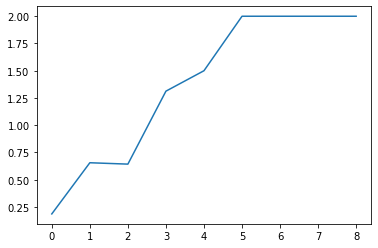

In [39]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt
df = data.groupby('SibSp')["Parch"].mean()
#df
plt.plot(df)
# <YOUR CODE>

## Task 3 (2 points)

In [40]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def feature_selection_and_preprocessing(dataset):
  #getting rid of tickets and cabins numbers
  data = dataset.drop(['Ticket','Cabin'],axis =1)
  
  # droping names 
  data = data.drop(['Name'], axis=1)

  # convert sex from catigorical to numerical
  data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
  

  #messuring the family for each passenger and creating a new feature which is IsAlone 

  data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
  data['IsAlone'] = 0
  data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
  data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

  #fill embarked missing values and convert to numerical
  freq_port = data.Embarked.dropna().mode()[0]
  data['Embarked'] = data['Embarked'].fillna(freq_port)
  data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

  # convert fare into ranges  
  # note that we can get those rages by using pd.qcut(data['Fare'], 4)

  data['Fare'].fillna(data['Fare'].dropna().median(), inplace=True)
  data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
  data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
  data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
  data.loc[ data['Fare'] > 31, 'Fare'] = 3
  data['Fare'] = data['Fare'].astype(int)


  #fill na in Age with mean
  mean_value=data['Age'].mean()
  data['Age'] = data['Age'].fillna(mean_value)

  #replace age based on bands into 5 catigories we can aquire those bands by running pd.qcut(data['Age'], 5)
  data.loc[ data['Age'] <= 16, 'Age'] = 0
  data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
  data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
  data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
  data.loc[ data['Age'] > 64, 'Age'] = 4

  data['Age'] = data['Age'].astype(int)

  return data

model = KNeighborsClassifier(
    n_neighbors=3
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.85


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

Test accuracy: 0.79


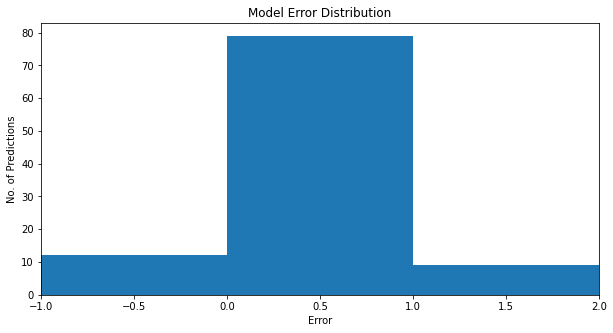

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv("train.csv", index_col='PassengerId')
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)
model.fit(
    feature_selection_and_preprocessing(
        X_train
    ),
    y_train
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        X_test
    )
)
print("Test accuracy:", accuracy_score(
    y_test,
    test_predictions
))
# <YOUR CODE>
error = y_test - test_predictions


plt.subplots(figsize=(10,5))
plt.xlim(-1, 2)
plt.title('Model Error Distribution')
plt.ylabel('No. of Predictions')
plt.xlabel('Error')
plt.hist(error, bins=np.linspace(-1, 2, num=41, dtype=int));
plt.show()